In [0]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas_datareader.data as web

In [0]:

style.use('ggplot')

start = dt.datetime(2015,1,1)
end = dt.datetime.now()

In [0]:
# grab initial data from analysis with datareader
df = web.DataReader('TSLA', 'yahoo', start, end)

In [0]:
print(df.head())

                  High         Low        Open       Close   Volume   Adj Close
Date                                                                           
2015-01-02  223.250000  213.259995  222.869995  219.309998  4764400  219.309998
2015-01-05  216.500000  207.160004  214.550003  210.089996  5368500  210.089996
2015-01-06  214.199997  204.210007  210.059998  211.279999  6261900  211.279999
2015-01-07  214.779999  209.779999  213.350006  210.949997  2968400  210.949997
2015-01-08  213.800003  210.009995  212.809998  210.619995  3442500  210.619995


In [0]:
df.reset_index(inplace=True)
df.set_index('Date', inplace=True)
#df = df.drop("Symbol", axis=1)
df.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,223.250000,213.259995,222.869995,219.309998,4764400,219.309998
2015-01-05,216.500000,207.160004,214.550003,210.089996,5368500,210.089996
2015-01-06,214.199997,204.210007,210.059998,211.279999,6261900,211.279999
2015-01-07,214.779999,209.779999,213.350006,210.949997,2968400,210.949997
2015-01-08,213.800003,210.009995,212.809998,210.619995,3442500,210.619995


In [0]:
df.to_csv('TSLA.csv')

In [0]:
df = pd.read_csv('TSLA.csv', parse_dates=True, index_col=0)

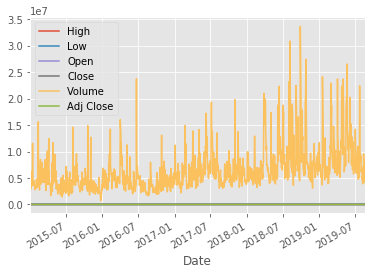

In [0]:
df.plot() #only shows volume as scale is off
plt.show()

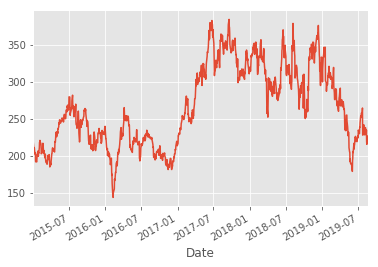

In [0]:
df["Adj Close"].plot()
plt.show()

In [0]:
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
print(df.head())

                  High         Low        Open  ...   Volume   Adj Close       100ma
Date                                            ...                                 
2015-01-02  223.250000  213.259995  222.869995  ...  4764400  219.309998  219.309998
2015-01-05  216.500000  207.160004  214.550003  ...  5368500  210.089996  214.699997
2015-01-06  214.199997  204.210007  210.059998  ...  6261900  211.279999  213.559998
2015-01-07  214.779999  209.779999  213.350006  ...  2968400  210.949997  212.907497
2015-01-08  213.800003  210.009995  212.809998  ...  3442500  210.619995  212.449997

[5 rows x 7 columns]


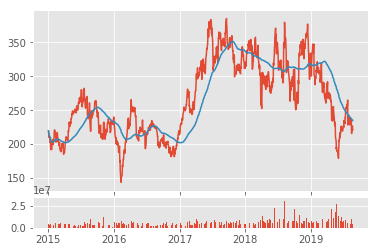

In [0]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])
plt.show()

In [0]:
# make candlesticks OHLC data
#from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

In [0]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_ohlc.head()

,open,high,low,close
Date,,,,
2015-01-02,219.309998,219.309998,206.660004,206.660004
2015-01-12,202.210007,204.250000,191.869995,196.570007
2015-01-22,201.619995,206.550003,199.369995,203.600006
2015-02-01,210.940002,220.990005,210.940002,216.289993
2015-02-11,212.800003,217.110001,202.880005,217.110001


In [0]:
df_volume = df['Volume'].resample('10D').sum()
df_ohlc = df_ohlc.reset_index()
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

In [0]:

import matplotlib.ticker as mticker
#from matplotlib.mpl_finance import candlestick_ohlc

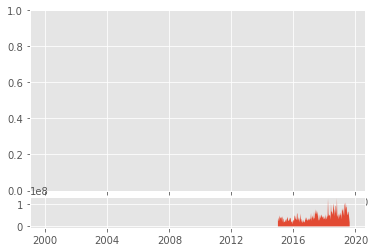

In [0]:
fig = plt.figure()
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

#candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()

HERE UPDATED CODE TO PULL STOCK DATA

In [0]:
# use beautiful soup, pickle, requests
import bs4 as bs
import pickle
import requests
import os

In [5]:
# function to save sp500
def save_sp500_tickers():
  resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
  soup = bs.BeautifulSoup(resp.text, 'lxml')
  table = soup.find('table', {'class': 'wikitable sortable'})
  tickers = []
  #print(table.findAll('tr'))
  for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker[0:-1])
    
  with open("sp500tickers.pickle",'wb') as f:
    pickle.dump(tickers, f)
  return tickers

save_sp500_tickers()


['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AMG',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'ANET',
 'AJG',
 'AIZ',
 'ATO',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BHGE',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BBT',
 'BDX',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CPRI',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CBS',
 'CE',
 'CELG',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CM

In [10]:
!pip install quandl
import quandl
quandl.ApiConfig.api_key = 'UVb4uimixAKqUKeUZ1sw'

     |████████████████████████████████| 61kB 20.5MB/s 
     |████████████████████████████████| 61kB 23.6MB/s 
     |████████████████████████████████| 2.3MB 14.6MB/s 
     |████████████████████████████████| 102kB 28.8MB/s 
  Created wheel for inflection: filename=inflection-0.3.1-cp36-none-any.whl size=6077 sha256=afa385315ee84dcb9e8d358327c97d1b280dbaca3d8bbe127fab8e9c87fcdb04
  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: more-itertools 7.2.0
    Uninstalling more-itertools-7.2.0:
      Successfully uninstalled more-itertools-7.2.0


In [0]:
# reload func
def get_data_from_yahoo(reload_sp500=False):
  if reload_sp500:
    tickers = save_sp500_tickers()
  else:
    with open("sp500tickers.pickle", "rb") as f:
      tickers = pickle.load(f)
  if not os.path.exists('stock_dfs'):
    os.makedirs('stock_dfs')
    
  start = dt.datetime(2010,1,1)
  end = dt.datetime.now()
  
  for ticker in tickers:
    if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
      try:
        
        
        #df = web.DataReader(ticker, 'yahoo',start,end)
        df = quandl.get("WIKI/"+string, start_date=start, end_date=end)
        df.reset_index(inplace=True)
        df.set_index('Date', inplace=True)
        #df = df.drop('Symbol', axis=1)
        print(ticker+' added')
        df.to_csv('stock_dfs/{}.csv'.format(ticker))
      except:
        print(r'Not found '+ticker)
    else:
      print("Already have {}".format(ticker))
      
get_data_from_yahoo()

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [13]:
string = 'MSFT'
start = dt.datetime(2014,1,1)
end = dt.datetime.now()
# how does this work but rest does not?
data = quandl.get("WIKI/"+string, start_date=start, end_date=end)
data.head(2)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2014-01-02,37.35,37.40,37.1,37.16,30632200.0,0.0,1.0,33.704254,33.749373,33.478656,33.532800,30632200.0
2014-01-03,37.20,37.22,36.6,36.91,31134800.0,0.0,1.0,33.568895,33.586943,33.027461,33.307202,31134800.0


In [0]:
# compile data into one DF
def compile_data():
  with open('sp500tickers.pickle', 'rb') as f:
    tickers = pickle.load(f)
  main_df = pd.DataFrame()
  for count, ticker in enumerate(tickers):
    try:
      df= pd.read_csv('stock_dfs/{}.csv'.format(ticker))
    
      df.set_index('Date', inplace=True)
      df.rename(columns={'Adj. Close':ticker}, inplace=True)
      df.drop(['Open','High','Low','Close','Volume','Adj. Volume',
               'Adj. High','Ex-Dividend','Adj. Open','Split Ratio','Adj. Low'],1,inplace=True)
     # print(df.head(1))
      #build main DF
      if main_df.empty:
        main_df = df
      else:
        main_df = main_df.join(df, how='outer')
        # ouptut count of current ticker if divisible by 10
      if count % 10 == 0:
        print(count)
    except:
      print('not found {}'.format(ticker))
      continue
  print(main_df.head())
  main_df.to_csv('sp500_joined_closes.csv')
  
compile_data()

In [16]:
%autosave 60
%matplotlib inline
#%matplotlib notebook
#!pip install mpld3
#import mpld3
#mpld3.enable_notebook()

Autosaving every 60 seconds


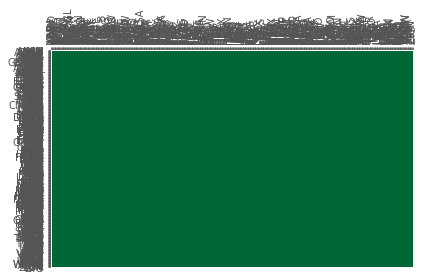

In [17]:

# got full sp500 (limited) stocks in main_df
def visualize_data():
  df = pd.read_csv('sp500_joined_closes.csv')
  # build correlation table
  df_corr = df.corr()
  #print(df_corr.head(2))
  df_corr.to_csv('sp500corr.csv')
  # heatmap of correlations
  data1 = df_corr.values
  fig1 = plt.figure()
  ax1 = fig1.add_subplot(111)
  heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)
  # set x, y axis ticks for companies
  ax1.set_xticks(np.arange(data1.shape[1])+0.5, minor=False)
  ax1.set_yticks(np.arange(data1.shape[0])+0.5, minor=False)
  # flip yaxis
  ax1.invert_yaxis()
  ax1.xaxis.tick_top()
  column_labels = df_corr.columns
  row_labels = df_corr.index
  ax1.set_xticklabels(column_labels)
  ax1.set_yticklabels(row_labels)
  # final touch ups
  plt.xticks(rotation=90)
  heatmap1.set_clim(-1,1)
  plt.tight_layout()
  plt.savefig('correlations.png', dpi=(300))
  plt.show()
  
visualize_data()

In [0]:
!pip install ipympl

In [0]:
### USE ML to see if model can classify the correlations between stocks and predict it in the future ###
# all machine learning needs featuresets mapped to labels, must convert existing data 
# feature = price diff that day for all companies in dataset
# label = whether stock XYZ rose more than x% within the next t days (pick whatever for x)

In [0]:
# process data for our labels
# each model trained on single company
def process_data_for_labels(ticker):
  hm_days = 7
  df = pd.read_csv('sp500_joined_closes.csv', index_col=0)
  tickers = df.columns.values.tolist()
  df.fillna(0, inplace=True)
  #grab % change values for next 7 days, create new df columns, get future values with .shift (shifting a col up or down)
  for i in range(1,hm_days+1):
    df['{}_{}d'.format(ticker,i)] = (df[ticker].shift(-i) - df[ticker])/ df[ticker]
  
  df.fillna(0, inplace=True)
  return tickers, df

In [0]:
# function that will create our label (could dictate buys, sells, holds) ex, price up 2% in next 7 days = buy
# map this function with apply to pandas DF so 0=hold, 1=buy, -1=sell
def buy_sell_hold(*args):
  cols = [c for c in args]
  requirement = 0.02
  for c in cols:
    if c > requirement:
      return 1
    if c < -requirement:
      return -1
  return 0


In [0]:
from collections import Counter
# check distribution of classes in dataset and algo prediction
# check if classifier is only predicting one class
def extract_featuresets(ticker):
  tickers, df = process_data_for_labels(ticker)
  df['{}_target'.format(ticker)] = list(map(buy_sell_hold,
                                           df['{}_1d'.format(ticker)],
                                           df['{}_2d'.format(ticker)],
                                           df['{}_3d'.format(ticker)],
                                           df['{}_4d'.format(ticker)],
                                           df['{}_5d'.format(ticker)],
                                           df['{}_6d'.format(ticker)],
                                           df['{}_7d'.format(ticker)]))
  
  # takes in ticker, creates dataset using prev functions, creates our target column (our LABEL)
  vals = df['{}_target'.format(ticker)].values.tolist()
  str_vals = [str(i) for i in vals]
  print('Data spread:', Counter(str_vals))
  # clean data
  
  df.fillna(0, inplace=True)
  df = df.replace([np.inf, -np.inf], np.nan)
  df.dropna(inplace=True)

  # now change features day's prices to percent change that day & fill in data
  df_vals = df[[ticker for ticker in tickers]].pct_change() # use apply
  df_vals = df_vals.replace([np.inf, -np.inf], 0)
  df_vals.fillna(0, inplace=True)
  
  X = df_vals.values
  y = df['{}_target'.format(ticker)].values
  
  return X,y,df

In [26]:
!pip install scikit-learn
#!pip install scikit-learn.model_selection.cross_validation
from sklearn import svm, model_selection, neighbors

from sklearn.ensemble import VotingClassifier, RandomForestClassifier

In [0]:
# incorporate featureset data into ML model
def do_ml(ticker):
  X, y, df = extract_featuresets(ticker)
  X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.25)
  # choose classifier
  clf = neighbors.KNeighborsClassifier()
  clf.fit(X_train, y_train)
  confidence = clf.score(X_test, y_test)
  print('accuracy:',confidence)
  predictions = clf.predict(X_test)
  print('predicted class counts:',Counter(predictions))
  print()

In [29]:
# test out a few samples
do_ml('XOM')
do_ml('AAPL')
do_ml('ABT')

Data spread: Counter({'1': 898, '-1': 649, '0': 524})
accuracy: 0.4015444015444015
predicted class counts: Counter({-1: 220, 1: 189, 0: 109})

Data spread: Counter({'1': 898, '-1': 649, '0': 524})
accuracy: 0.4034749034749035
predicted class counts: Counter({-1: 226, 1: 178, 0: 114})

Data spread: Counter({'1': 898, '-1': 649, '0': 524})
accuracy: 0.38803088803088803
predicted class counts: Counter({-1: 202, 1: 192, 0: 124})



In [0]:
def do_ml_voting(ticker): # using votingclassifier
  X, y, df = extract_featuresets(ticker)
  X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.25)
  # choose classifier
  clf = VotingClassifier([('lsvc',svm.LinearSVC()),
                         ('knn',neighbors.KNeighborsClassifier()),
                         ('rfor',RandomForestClassifier())])
  clf.fit(X_train, y_train)
  confidence = clf.score(X_test, y_test)
  print('accuracy:',confidence)
  predictions = clf.predict(X_test)
  print('predicted class counts:',Counter(predictions))
  print()

In [40]:
# test out a few samples
do_ml('XOM')
do_ml('AAPL')
do_ml('GOOG')

Data spread: Counter({'1': 898, '-1': 649, '0': 524})
accuracy: 0.3918918918918919
predicted class counts: Counter({-1: 198, 1: 194, 0: 126})

Data spread: Counter({'1': 898, '-1': 649, '0': 524})
accuracy: 0.361003861003861
predicted class counts: Counter({-1: 217, 1: 171, 0: 130})

Data spread: Counter({'1': 898, '-1': 649, '0': 524})
accuracy: 0.3532818532818533
predicted class counts: Counter({-1: 209, 1: 199, 0: 110})

